https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [1]:
from Database import db_mongo
from Utilities import clean_text

import string

db = db_mongo.db_mongo()

df_base = db.get_text_full_resume(100000000)

df_base = df_base.sample(frac=1).reset_index(drop=True)

ct = clean_text.CleanText()

df_base['text'] = ct.cleanner_process(df_base["text"])

df = df_base.copy()

Init DB


[nltk_data] Downloading package wordnet to /home/kguttas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_base["class"].unique()

array(['ADVOCATE', 'CHEF', 'AVIATION', 'CONSTRUCTION', 'FITNESS',
       'TEACHER', 'ACCOUNTANT', 'BUSINESS-DEVELOPMENT', 'ARTS',
       'DIGITAL-MEDIA', 'HEALTHCARE', 'APPAREL', 'SALES',
       'INFORMATION-TECHNOLOGY', 'ENGINEERING', 'PUBLIC-RELATIONS',
       'DESIGNER', 'CONSULTANT', 'AGRICULTURE', 'BANKING', 'HR',
       'AUTOMOBILE', 'FINANCE', 'BPO'], dtype=object)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
from chart_studio import plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

2021-12-10 04:59:35.968577: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-10 04:59:35.968615: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
df_base['class'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Resumes', 
                                                                title='Number resumes in each class')

In [5]:
def print_plot(index):
    example = df[df.index == index][['text', 'class']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Class:', example[1])

In [6]:
print_plot(10)

fit traineerecr manag intern accomplish volunt newman share food pantri collect nonperish food item lowincom student famili develop profession skill attend profession develop workshop such career fair prepar commun instruct career center profession rauner famili ymca recruit volunt manag ticket halloween fair volunt hour over cours year school program account child age dure activ profession summari experienc sale employe skill event plan microsoft excel custom servic microsoft word microsoft offic strong sale profession with bachelor degre focus recreat sport tourism from univers illinoi urbanachampaign with dean list jame scholar recognit skill excel intermedi microsoft word intermedi powerpoint intermedi data manag team leadership selfmotiv extrem organ staff develop project manag team liaison work histori fit traineerecr manag intern compani name citi state januari current research plan exercis option fitgam identifi creat busi contact updat social medium account with weekli post im

In [7]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['text'] = df['text'].apply(clean_text)

In [8]:
df['text'] = df['text'].str.replace('\d+', '')

In [9]:
print_plot(10)

fit traineerecr manag intern accomplish volunt newman share food pantri collect nonperish food item lowincom student famili develop profession skill attend profession develop workshop career fair prepar commun instruct career center profession rauner famili ymca recruit volunt manag ticket halloween fair volunt hour cours year school program account child age dure activ profession summari eperienc sale employe skill event plan microsoft ecel custom servic microsoft word microsoft offic strong sale profession bachelor degre focus recreat sport tourism univers illinoi urbanachampaign dean list jame scholar recognit skill ecel intermedi microsoft word intermedi powerpoint intermedi data manag team leadership selfmotiv etrem organ staff develop project manag team liaison work histori fit traineerecr manag intern compani name citi state januari current research plan eercis option fitgam identifi creat busi contact updat social medium account weekli post implement strategi approv owner busi 

In [10]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 100000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 1000
# This is fixed.
EMBEDDING_DIM = 80

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 34985 unique tokens.


In [11]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2484, 1000)


In [12]:
Y = pd.get_dummies(df['class']).values
print('Shape of label tensor:', Y.shape)
Y

Shape of label tensor: (2484, 24)


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1987, 1000) (1987, 24)
(497, 1000) (497, 24)


In [16]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(256, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(32, activation="relu"))
model.add(Dense(Y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 80)          8000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 1000, 80)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 256)               345088    
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                      

In [17]:
epochs = 40
batch_size = 256

history = model.fit(X_train, Y_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4, min_delta=0.001)])


Epoch 1/40
7/7 [==============================] - 71s 6s/step - loss: 3.1766 - accuracy: 0.0414 - val_loss: 3.1776 - val_accuracy: 0.0201
Epoch 2/40
7/7 [==============================] - 41s 6s/step - loss: 3.1720 - accuracy: 0.0470 - val_loss: 3.1803 - val_accuracy: 0.0201
Epoch 3/40
7/7 [==============================] - 41s 6s/step - loss: 3.1599 - accuracy: 0.0710 - val_loss: 3.1716 - val_accuracy: 0.0352
Epoch 4/40
7/7 [==============================] - 41s 6s/step - loss: 3.1500 - accuracy: 0.0817 - val_loss: 3.1673 - val_accuracy: 0.0352
Epoch 5/40
7/7 [==============================] - 42s 6s/step - loss: 3.1168 - accuracy: 0.0671 - val_loss: 3.1415 - val_accuracy: 0.0251
Epoch 6/40
7/7 [==============================] - 41s 6s/step - loss: 3.1598 - accuracy: 0.0800 - val_loss: 3.1543 - val_accuracy: 0.0302
Epoch 7/40
7/7 [==============================] - 40s 6s/step - loss: 3.0997 - accuracy: 0.0621 - val_loss: 3.1560 - val_accuracy: 0.0352
Epoch 8/40
7/7 [==================

In [18]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16/16 [==============================] - 6s 389ms/step - loss: 3.0980 - accuracy: 0.2193
Test set
  Loss: 3.098
  Accuracy: 0.219


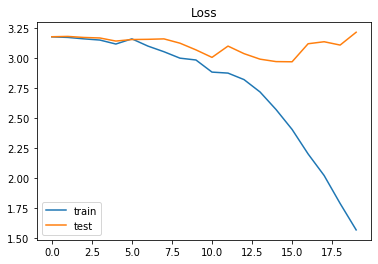

In [19]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

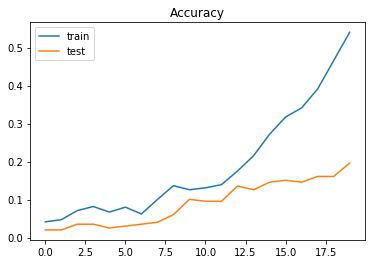

In [20]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [21]:
df_base["text"].iloc[64]
df_base["class"].iloc[64]

'lea consult summari microsoft offic year sale year quickbook year perform manag year account year market research year market strategi year market commun year financi analysi year public relat year accomplish whom concern name vincent hall hate onesizefitsal approach busi when market doesnt feel like market peopl organ connect your messag youv birth movement gone day where individu root autonomi allow label lone wolf heroic conquer corpor ladder similarli busi entiti cannot surviv current global hypercompetit market through what call corpor isolation busi whether startup establish titan industri must alway find relev way connect commun with audienc interest busi start when friend stepfath told onli road success build through work creativ thi statement birth passion drive onli understand human behavior what motiv also mechan behind product posit what about product make appeal busi increas deliveri effici doe busi drive profit margin while drive down product cost conclus between experi 

'CONSULTANT'

In [30]:
new_complaint = [df_base["text"].iloc[607]]

seq = tokenizer.texts_to_sequences(new_complaint)

padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred = model.predict(padded)

labels = df_base["class"].unique()
print(pred, labels[np.argmax(pred)])

[[7.4877381e-01 1.7639558e-04 4.7016842e-06 1.0557092e-03 3.6832738e-08
  4.9293646e-07 5.2267056e-02 9.1910428e-05 4.2183765e-05 2.6683918e-07
  2.9822933e-02 5.9605627e-05 5.3427060e-04 2.7402575e-07 1.3725490e-05
  1.4284779e-03 5.5043489e-02 4.2797954e-05 8.2207343e-04 5.2451707e-02
  2.5683954e-02 1.7037003e-07 3.1683918e-02 3.3764053e-08]] ADVOCATE


In [31]:
new_complaint = ["software developer for ten year"]

seq = tokenizer.texts_to_sequences(new_complaint)

padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred = model.predict(padded)

labels = df_base["class"].unique()
print(pred, labels[np.argmax(pred)])

[[4.1834640e-04 1.3293457e-01 4.0235358e-05 1.5794879e-01 7.6461174e-06
  5.2786246e-03 1.8400794e-01 3.8168255e-05 4.0194627e-05 9.1536655e-05
  2.4310972e-01 9.8604560e-06 2.4137119e-04 9.1025129e-08 2.5132054e-05
  1.9064646e-06 4.8997656e-02 4.2541613e-04 2.1074444e-01 6.2837957e-05
  6.2346575e-04 3.8625279e-07 1.4951595e-02 5.0503825e-08]] HEALTHCARE
